# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

Using TensorFlow backend.


2019-06-18 17:19:53.064618


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-18 17:19:56.876254


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 0s 0us/step
2019-06-18 17:20:00.741034


(60000, 28, 28)
2019-06-18 17:20:02.316817


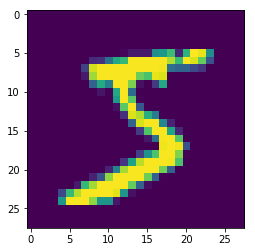

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-18 17:20:04.163010


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-18 17:20:05.586970


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-06-18 17:20:07.393166


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-18 17:20:09.812069


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-18 17:20:11.527607


In [10]:
## MAIN BLOCK

from keras.layers import Activation
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization

# Input layer
x1 = Input(shape=(28,28,1))

# first convolution block
x2 = Conv2D(32, kernel_size=3, padding='same', activation='relu')(x1) #28
# x2 = BatchNormalization()(x2)
# x2 = Dropout(0.2)(x2) 

x2 = concatenate([x1, x2])
x3 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x2) #28
# x3 = BatchNormalization()(x3)
# x3 = Dropout(0.2)(x3) 

x3 = concatenate([x1, x2, x3])
x4 = MaxPooling2D(pool_size=(2, 2))(x3) #14


x5 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x4) #14
# x5 = BatchNormalization()(x5)
# x5 = Dropout(0.2)(x5) 

x5 = concatenate([x4, x5])
x6 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x5) #14
# x6 = BatchNormalization()(x6)
# x6 = Dropout(0.2)(x6) 

x6 = concatenate([x4, x5, x6])
x7 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x6) #14
# x7 = BatchNormalization()(x7)
# x7 = Dropout(0.2)(x7) 

x7 = concatenate([x5, x6, x7])
x8 = MaxPooling2D(pool_size=(2, 2))(x7) #7


x9 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x8) #7
# x9 = BatchNormalization()(x9)
# x9 = Dropout(0.2)(x9) 

x9 = concatenate([x8, x9])
x10 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x9) #7
# x10 = BatchNormalization()(x10)
# x10 = Dropout(0.2)(x10) 

x10 = concatenate([x8, x9, x10])
x11 = Conv2D(256, kernel_size=3, padding='same', activation='relu')(x10) #7
# x11 = BatchNormalization()(x11)
# x11 = Dropout(0.2)(x11) 

x11 = Conv2D(10, kernel_size=7)(x11) #1





x11 = Flatten()(x11)
output = Activation('softmax')(x11)


model = Model(inputs=[x1], outputs=output)

print(datetime.datetime.now())

W0618 17:20:12.858916 140513737762688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 17:20:12.872314 140513737762688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 17:20:12.875676 140513737762688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 17:20:12.906073 140513737762688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



2019-06-18 17:20:12.999443


In [11]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 28, 33)   0           input_1[0][0]                    
                                                                 conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 64)   19072       concatenate_1[0][0]              
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

W0618 17:20:19.663539 140513737762688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 17:20:19.688031 140513737762688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



2019-06-18 17:20:19.705694


In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0618 17:20:22.760429 140513737762688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0618 17:20:22.967974 140513737762688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.0990 - acc: 0.9695
Epoch 2/10
60000/60000 [==============================] - 42s 695us/step - loss: 0.0387 - acc: 0.9885
Epoch 3/10
60000/60000 [==============================] - 42s 697us/step - loss: 0.0292 - acc: 0.9906
Epoch 4/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0259 - acc: 0.9920
Epoch 5/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.0200 - acc: 0.9943
Epoch 6/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.0185 - acc: 0.9948
Epoch 7/10
60000/60000 [==============================] - 41s 687us/step - loss: 0.0163 - acc: 0.9953
Epoch 8/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0158 - acc: 0.9961
Epoch 9/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0163 - acc: 0.9958
Epoch 10/10
60000/60000 [==============================] - 41s 685us/step - loss: 

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-18 17:27:34.819945


In [15]:
print(score)
print(datetime.datetime.now())

[0.057229423851538994, 0.9907]
2019-06-18 17:27:37.154715
